# 2) Report download statistics

This Jupyter Notebook contains code and analysis for analyzing and visualizing data from a CSV file. The notebook utilizes the pandas library to read and manipulate the data, and the matplotlib library to create various types of graphs and visualizations.

The notebook is organized into multiple cells, each serving a specific purpose. The cells include importing necessary libraries, reading the CSV file, performing data manipulation and analysis, and creating different types of graphs and visualizations.

The goal of this notebook is to provide a step-by-step guide for analyzing and visualizing data from a CSV file using Python and Jupyter Notebook.

Please execute the cells in sequential order to ensure the proper execution of the code and generation of the desired visualizations.

#### Dependencies

Please note that this notebook requires the installation of the necessary dependencies, such as pandas, matplotlib, and the Google Big Query SDK.

see [requirements-stats.txt](../requirements-stats.txt) for a list of dependencies.


In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

# read the current data from the csv file
csv_file = Path("downloads.csv") 

In [2]:
from datetime import datetime


df = pd.read_csv(csv_file, index_col="report_date", parse_dates=True, infer_datetime_format=True)
df = df.rename(columns={"num_downloads": "downloads"}).sort_values(by="downloads", ascending=False)

df.head(10)

C:\Users\josverl\AppData\Local\Temp\ipykernel_31544\3049643293.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(csv_file, index_col="report_date", parse_dates=True, infer_datetime_format=True)


,downloads,port,board,version,project,version_full
report_date,,,,,,
2023-11-01,1333,stdlib,NaN,NaN,micropython-stdlib-stubs,1.0.0
2023-10-01,1276,stdlib,NaN,NaN,micropython-stdlib-stubs,1.0.0
2023-12-01,990,stdlib,NaN,NaN,micropython-stdlib-stubs,1.0.0
2024-01-01,916,stdlib,NaN,NaN,micropython-stdlib-stubs,1.1.1
2023-08-01,851,stdlib,NaN,NaN,micropython-stdlib-stubs,0.9.0
2023-04-01,777,stdlib,NaN,NaN,micropython-stdlib-stubs,0.9.0
2023-08-01,764,rp2,pico,1.20.0,micropython-rp2-pico-stubs,1.20.0.post2
2023-05-01,565,stdlib,NaN,NaN,micropython-stdlib-stubs,0.9.0
2023-07-01,509,stdlib,NaN,NaN,micropython-stdlib-stubs,0.9.0


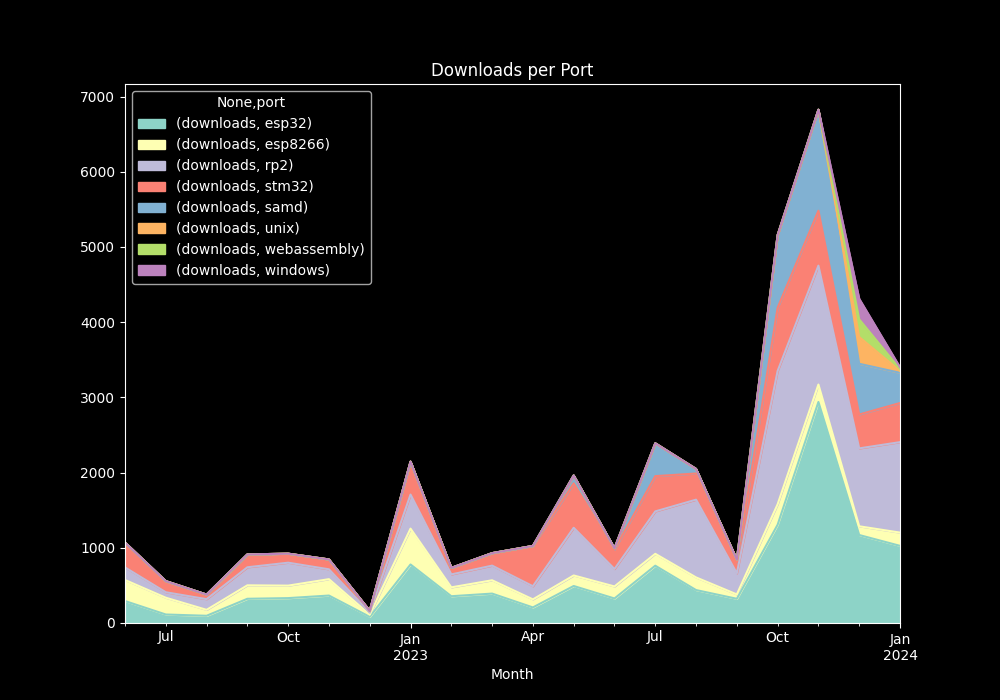

In [3]:
# create a graph of the number of projects downloaded grouped by project, per report_date

# create a new dataframe with the data grouped by month and project
## create a graph based on the information in the dataframe and create a plot that groups by project and shows the downloads per report_date
df_port = df.groupby(["report_date", "port"]).sum(numeric_only=True)
df_port_filtered = df_port[df_port.index.get_level_values("port") != "stdlib"]
# df_port.unstack().plot(kind="area", title="Downloads per Port",xlabel="Month", subplots=True, )
# df_port.unstack().plot(kind="area", title="Downloads per Port",xlabel="Month", stacked=True)
df_port_filtered.unstack().plot(
    kind="area",
    title="Downloads per Port",
    xlabel="Month",
    stacked=True,
    table=False,
    figsize=(10, 7),
)
plt.savefig("month_port.png", dpi=100)

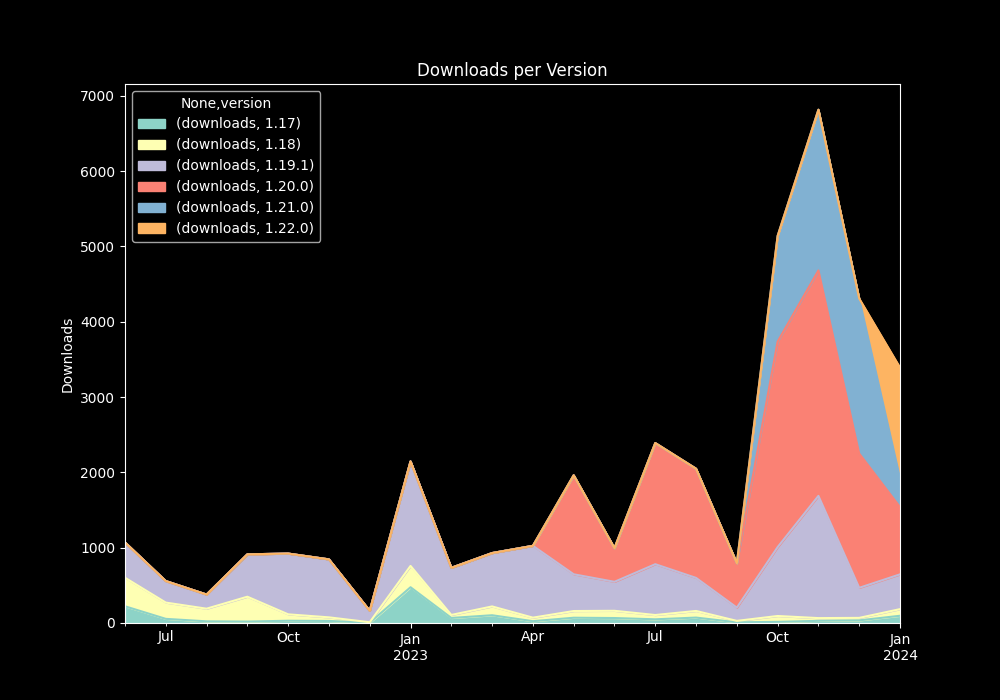

In [4]:
# select only the rows that have a version
df_port = df.groupby(["report_date", "version"]).sum(numeric_only=True)
df_port.unstack().plot(
    kind="area",
    title="Downloads per Version",
    ylabel="Downloads",
    xlabel="",
    stacked=True,
    table=False,
    figsize=(10, 7),
)
plt.savefig("month_version.png", dpi=100)

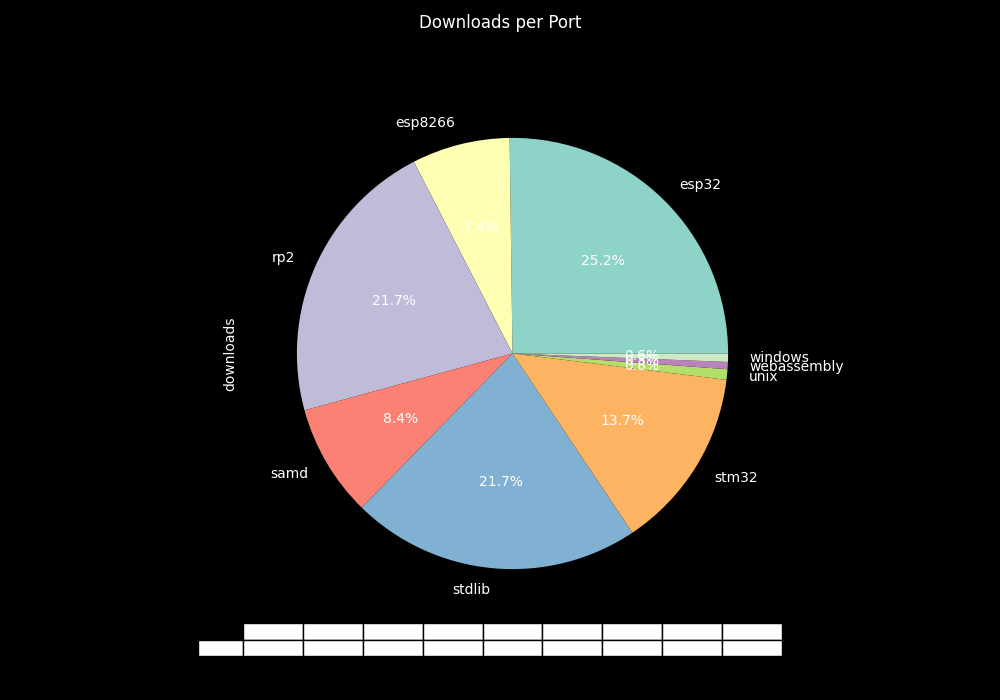

In [5]:
# create a piechart of the number of projects downloaded grouped by port
df_port = df.groupby(["port"]).sum(numeric_only=True)
pie = df_port.plot(
    kind="pie",
    title="Downloads per Port",
    autopct="%1.1f%%",
    legend=False,
    subplots=True,
    table=True,
    figsize=(10, 7),
)
plt.savefig("pie_port.png", dpi=100)

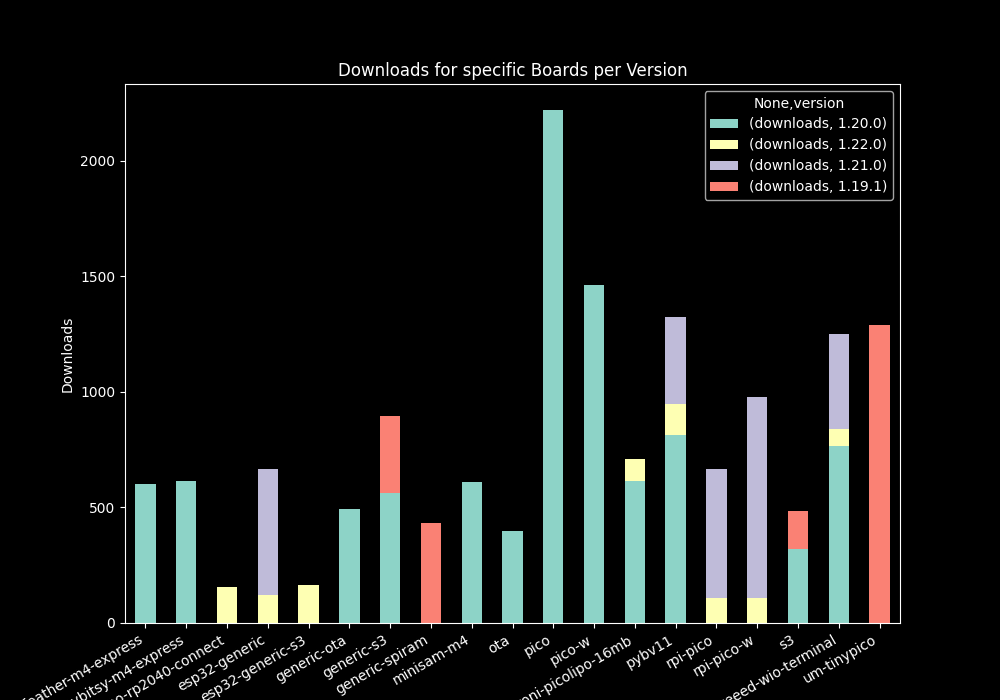

In [7]:
# create a chart of the number of projects downloaded per board , stacked by version,
df_port = df.groupby(["board", "version"]).sum(numeric_only=True)
ax = df_port.unstack().plot(
    kind="bar",
    title="Downloads for specific Boards per Version",
    ylabel="Downloads",
    xlabel="",
    stacked=True,
    table=False,
    figsize=(10, 7),
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.savefig("board_version.png", dpi=100)